# TP - HMMA238

Par Mathias Gout et Julie Røste.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rcParams["figure.figsize"] = (17,8)

## Exercice 1 - Le jeu de la vie

### Question 4:

In [2]:
from utils import calcul_nb_voisins

Z_init = [[0,0,0,0,0,0], 
          [0,0,0,1,0,0], 
          [0,1,0,1,0,0], 
          [0,0,1,1,0,0],
          [0,0,0,0,0,0], 
          [0,0,0,0,0,0]]
     

calcul_nb_voisins(Z_init)

[[0, 0, 0, 0, 0, 0],
 [0, 1, 3, 1, 2, 0],
 [0, 1, 5, 3, 3, 0],
 [0, 2, 3, 2, 2, 0],
 [0, 1, 2, 2, 1, 0],
 [0, 0, 0, 0, 0, 0]]

calcul_nb_voisins(Z) affiche le nombre de voisins vivants de chaque cellules

### Question 5:

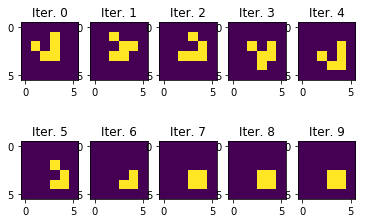

In [3]:
from utils import iteration_jeu

Z = np.asarray(Z_init)
nbIterations = 10
#plt.figure(figsize=(10,5))
plt.subplot(2,5,1)
plt.title("Iter. 0")
plt.imshow(Z)
for i in range(2,nbIterations+1):
    plt.subplot(2,5,i)
    Z = iteration_jeu(Z)
    plt.title("Iter. "+str(i-1))
    plt.imshow(Z)

### Question 6:

On remarque que les cellules vivantes de l'itération 0 sont disposées de la même façon que celles de l'itération 4. 
<br/>Entre l'itération 0 et 4, les cellules vivantes se sont toutes déplacées d'une cellule en bas et d'une cellule à droite.

A partir de l'itération 7, les cellules ne changent plus d'état. 
Les quatres cellules vivantes sont regroupées en bas à droite et ont toutes 3 voisins vivants (aucun décès possible).
<br/>Comme aucune cellule morte n'a 3 voisins vivants (pas de naissance possible), il n'y aura pas d'évolution dans les prochaines itérations.


## Exercice 2 - Régression logistique

### Question 1:

In [4]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

In [5]:
X = mnist.data.astype('float64') 
y = mnist.target.astype('float64')

### Question 2:

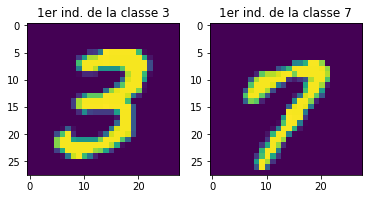

In [6]:
# On garde que les 3 et 7
X = X[(y==3) + (y==7)] 
y = y[(y==3) + (y==7)] 

# Premier individu de la classe 3 et 7
premier_3 = np.where(y==3)[0][0]
premier_7 = np.where(y==7)[0][0]

# On affiche les 2 individus
plt.subplot(1, 2, 1)
plt.title("1er ind. de la classe 3")
plt.imshow(X[premier_3].reshape(28,28))
plt.subplot(1, 2, 2)
plt.title("1er ind. de la classe 7")
plt.imshow(X[premier_7].reshape(28,28))

### Question 3:

In [7]:
from sklearn.linear_model import LogisticRegression 

# Regression logistique 
reg_log = LogisticRegression(fit_intercept=False, solver='liblinear').fit(X, y)

### Question 4:

In [8]:
from ipywidgets import interact, fixed
from utils import fig_digit 

In [9]:
# Nous avons fait varier alpha de 1 en 1 pour plus de fluidité
interact(fig_digit, x=fixed(X[premier_7]), w=fixed(reg_log.coef_), alpha=(0,100,1));

interactive(children=(IntSlider(value=50, description='alpha'), Output()), _dom_classes=('widget-interact',))

### Question 5:

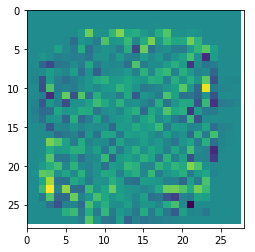

In [10]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 28), ylim=(28, 0))
ims = []

for i in range(100):
    im = fig_digit(X[premier_7], reg_log.coef_, i)
    ims.append([im])
    
anim = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)

anim.to_html5_video()
plt.show()